In [4]:
import modish
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from modish.visualize import MODALITY_TO_COLOR, MODALITY_ORDER, MODALITY_PALETTE
modality_order = MODALITY_ORDER

sns.set(style='ticks', context='talk', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})

%matplotlib inline

%load_ext autoreload
%autoreload 2

folder = '/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure3_constitutively_expressed'
! mkdir $folder

import flotilla
study = flotilla.embark('singlecell_pnm_figure3_modalities_features')
# study = flotilla.embark('singlecell_pnm_figure1_supplementary_post_splicing_filtering')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2015-10-25 17:10:44	Reading datapackage from /home/obotvinnik/flotilla_projects/singlecell_pnm_figure3_modalities_features/datapackage.json
2015-10-25 17:10:44	Parsing datapackage to create a Study object
2015-10-25 17:11:29	Initializing Study
2015-10-25 17:11:29	Initializing Predictor configuration manager for Study
2015-10-25 17:11:29	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2015-10-25 17:11:29	Added ExtraTreesClassifier to default predictors
2015-10-25 17:11:29	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2015-10-25 17:11:29	Added ExtraTreesRegressor to default predictors
2015-10-25 17:11:29	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2015-10-25 17:11:29	Added GradientBoostingClassifier to default predictors
2015-10-2

In [5]:
from flotilla.compute.expression import differential_expression
singles_no_outliers = study.expression.singles.ix[study.splicing.singles.index.difference(study.splicing.outliers.index)]
print singles_no_outliers.shape
de_results = differential_expression(singles_no_outliers, study.sample_id_to_phenotype)

(181, 16028)


In [47]:
study.supplemental.differential_expression = de_results

In [48]:
study.save('singlecell_pnm_figure3_differential_expression')

Wrote datapackage to /home/obotvinnik/flotilla_projects/singlecell_pnm_figure3_differential_expression/datapackage.json


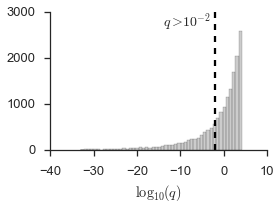

In [40]:
p_cutoff = 1e-2

log_p_cutoff = np.log10(p_cutoff)

fig, ax = plt.subplots(figsize=(4,3))
sns.distplot(np.log10(de_results.bonferonni_p_value), ax=ax, kde=False, color='grey')
ax.set(xlabel='$\log_{10}(q)$')
ymin, ymax = ax.get_ylim()
ax.vlines(log_p_cutoff, ymin, ymax, linestyle='--')
ax.text(log_p_cutoff - 1, 0.9*ymax, '$q > 10^{{{:d}}}$'.format(int(log_p_cutoff)), 
        horizontalalignment='right', fontsize=14)

ax.locator_params(nbins=5)
sns.despine()
fig.tight_layout()
fig.savefig('{}/differential_expression_bonferonni_p_value.pdf'.format(folder))

In [34]:
pkm_ensembl_id = study.expression.maybe_renamed_to_feature_id('PKM')[0]
de_results.loc[de_results.gene_id == pkm_ensembl_id]

,gene_id,U_statistic,p_value,bonferonni_p_value
4790,ENSG00000067225,27.26557,0.000001,0.019241


In [41]:
pkm_ensembl_id = study.expression.maybe_renamed_to_feature_id('DGUOK')[0]
de_results.loc[de_results.gene_id == pkm_ensembl_id]

,gene_id,U_statistic,p_value,bonferonni_p_value
12147,ENSG00000114956,5.542772,0.062575,1002.955581


In [42]:
pkm_ensembl_id = study.expression.maybe_renamed_to_feature_id('VPS29')[0]
de_results.loc[de_results.gene_id == pkm_ensembl_id]

,gene_id,U_statistic,p_value,bonferonni_p_value
14683,ENSG00000111237,1.591358,0.451275,7233.029889


In [43]:
pkm_ensembl_id = study.expression.maybe_renamed_to_feature_id('SRSF9')[0]
de_results.loc[de_results.gene_id == pkm_ensembl_id]

,gene_id,U_statistic,p_value,bonferonni_p_value
6545,ENSG00000111786,19.510463,0.000058,0.929472


In [46]:
pkm_ensembl_id = study.expression.maybe_renamed_to_feature_id('VDAC3')[0]
de_results.loc[de_results.gene_id == pkm_ensembl_id]

,gene_id,U_statistic,p_value,bonferonni_p_value
14967,ENSG00000078668,1.228439,0.541063,8672.157403


In [44]:
non_de_genes = de_results.gene_id[de_results.bonferonni_p_value >= p_cutoff]
de_genes = de_results.gene_id[de_results.bonferonni_p_value < p_cutoff]
print 'Constitutively expressed genes:', len(non_de_genes)
print 'Differentially expressed genes:', len(de_genes)

Constitutively expressed genes: 11483
Differentially expressed genes: 4545


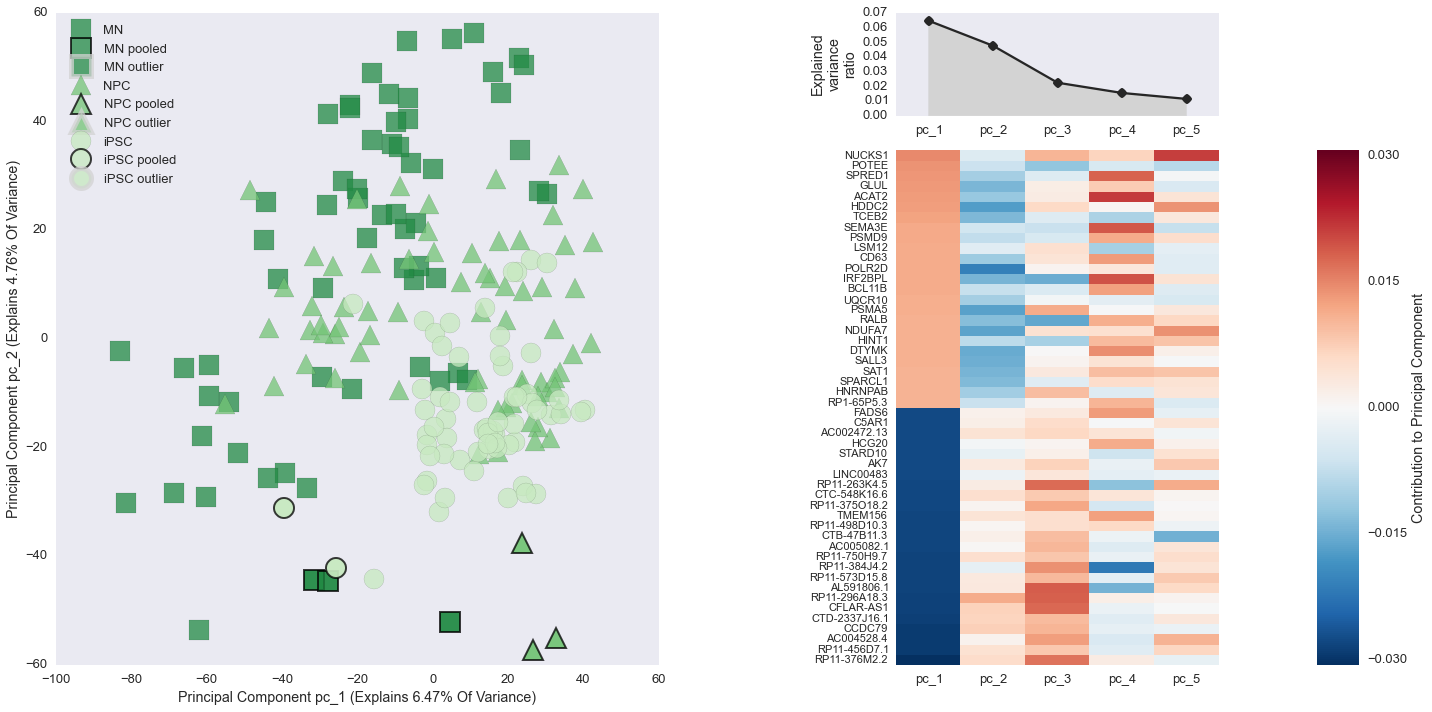

In [16]:
with sns.axes_style('dark'):
    v = study.plot_pca(feature_subset=non_de_genes,
                       sample_subset='~outlier', scale_by_variance=False, show_vectors=False, markersize=20)
    v.fig_reduced.savefig('{}/non_de_genes_expression_pca.pdf'.format(folder))

In [49]:
from flotilla.visualize.gene_ontology import plot_go_enrichment

/home/obotvinnik/workspace-git/flotilla/flotilla/study.py:1663: UserWarning: No background provided, defaulting to all expressed genes
  warnings.warn('No background provided, defaulting to all '


In [52]:
go.head()

,features_of_interest_in_go_term,features_of_interest_in_go_term_gene_symbols,go_domain,go_name,n_background_in_go_term,n_features_of_interest_in_go_term,n_features_total_in_go_term,p_value,bonferonni_corrected_p_value
GO:0008420,"ENSG00000144579,ENSG00000122484,ENSG0000006006...","CTDSP1,RPAP2,CTDP1,CTDSP2,SSU72",molecular_function,CTD phosphatase activity,5,5,6,0,0
GO:0016308,"ENSG00000143398,ENSG00000186111,ENSG0000015086...","PIP5K1A,PIP5K1C,PIP4K2A,PIP5K1B,PIKFYVE,PIP4K2B",molecular_function,1-phosphatidylinositol-4-phosphate 5-kinase ac...,6,6,7,0,0
GO:0007256,"ENSG00000258838,ENSG00000137802,ENSG0000022583...","ERCC6-PGBD3,MAPKBP1,ERCC6,TNIK,MAP3K9",biological_process,activation of JNKK activity,5,5,8,0,0
GO:0070544,"ENSG00000173120,ENSG00000183878,ENSG0000000645...","KDM2A,UTY,JHDM1D,PHF8,KDM4A",biological_process,histone H3-K36 demethylation,5,5,7,0,0
GO:0070536,"ENSG00000089723,ENSG00000083799,ENSG0000018066...","OTUB2,CYLD,YOD1,USP33,USP20,OTUD7B,BABAM1,ZRAN...",biological_process,protein K63-linked deubiquitination,14,14,19,0,0


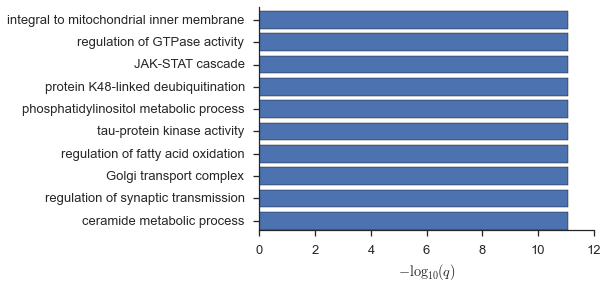

In [53]:
go = study.go_enrichment(non_de_genes, min_background_size=10, min_feature_size=5)
plot_go_enrichment(data=go)

In [54]:
go = study.plot_go_enrichment(de_genes, min_background_size=10, min_feature_size=5)
plot_go_enrichment(data=go)

AttributeError: 'Study' object has no attribute 'plot_go_enrichment'

In [45]:
event_ind = study.splicing.feature_data.ensembl_id.map(
    lambda x: non_de_genes.isin(x.split(',')).any() if isinstance(x, str) else False)

non_de_event_names = study.splicing.feature_data.index[event_ind]
print 'Splicing events in Constitutively expressed genes:', len(non_de_event_names)

Splicing events in Constitutively expressed genes: 21814


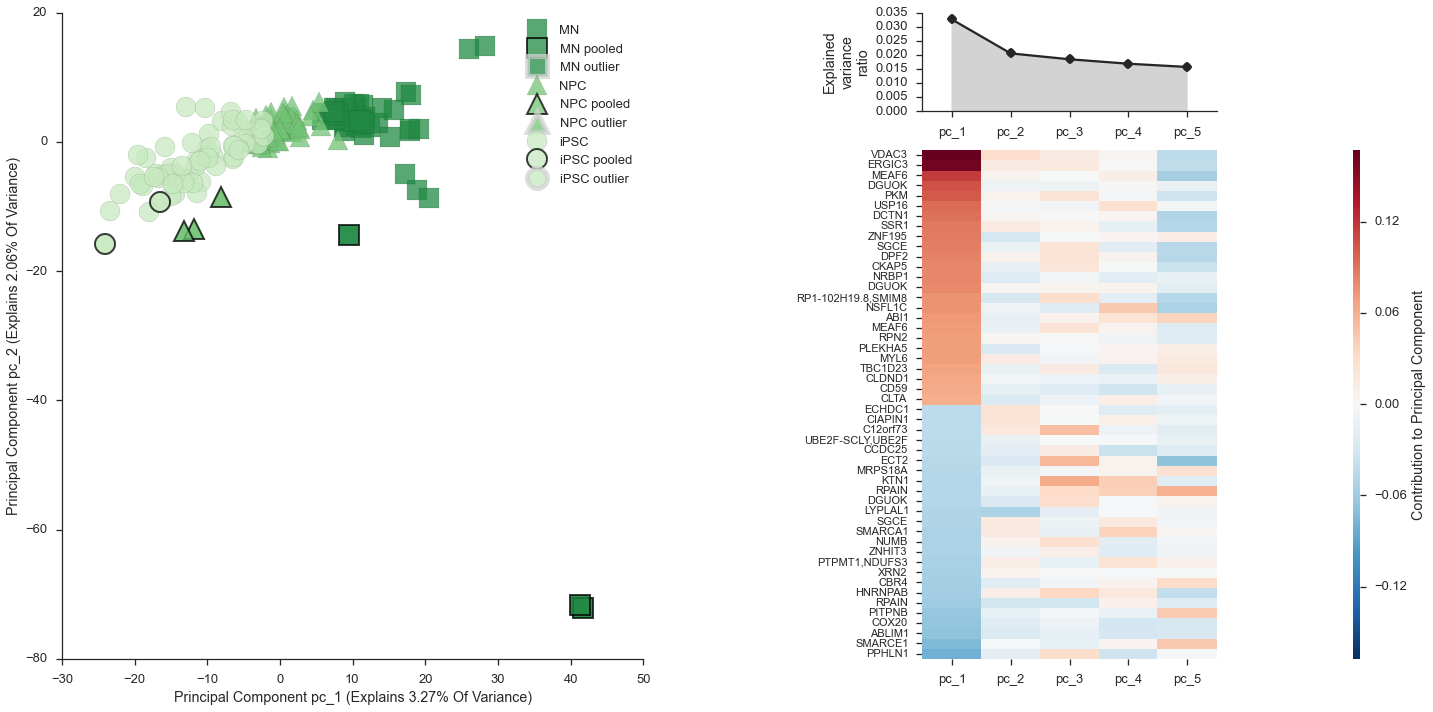

In [18]:
with sns.axes_style('ticks'):
    v = study.plot_pca(feature_subset=non_de_event_names, data_type='splicing',
                   sample_subset='~outlier', scale_by_variance=False, show_vectors=False, markersize=20)
    v.fig_reduced.savefig('{}/non_de_genes_splicing_pca.pdf'.format(folder))

In [21]:
modalities_non_de = study.supplemental.modalities_tidy.loc[study.supplemental.modalities_tidy.event_name.isin(non_de_event_names)]
modalities_de = study.supplemental.modalities_tidy.loc[~study.supplemental.modalities_tidy.event_name.isin(non_de_event_names)]

In [22]:
from modish.visualize import MODALITY_TO_COLOR, MODALITY_ORDER, MODALITY_PALETTE

import locale


locale.setlocale(locale.LC_ALL, 'en_US')


def annotate_bars(x, y, **kwargs):
    data = kwargs.pop('data')
    ax = plt.gca()
    width = 0.8/5.
    x_base = -.49 - width/2.5
    for phenotype, phenotype_df in data.groupby('phenotype'):
        i = 0
        for modality, modality_df in phenotype_df.groupby('modality'):
            i += 1
            x_position = x_base + width*i + width/2
            y_position = modality_df["Percentage of events"]
            try:
                value = modality_df.n_events.values[0]
                formatted = locale.format('%d', value, grouping=True)
                ax.annotate(formatted, (x_position, y_position),
                            textcoords='offset points', xytext=(0, 2),
                            ha='center', va='bottom', fontsize=12)
            except IndexError:
                continue
        x_base += 1

modality_factorplot_kws = dict(hue_order=MODALITY_ORDER, palette=MODALITY_PALETTE)

def modalities_barplot(modalities_tidy, modality_order, phenotype_order, factorplot_kws=None):
    factorplot_kws = {} if factorplot_kws == None else factorplot_kws

    modality_counts = modalities_tidy.groupby(['phenotype', 'modality']).size().reset_index()
    modality_counts = modality_counts.rename(columns={0:'n_events'})
    modality_counts['Percentage of events'] = modality_counts.groupby('phenotype').n_events.apply(
        lambda x: 100*x/x.astype(float).sum())

    modality_counts.modality = pd.Categorical(modality_counts.modality, categories=modality_order, ordered=True)
    modality_counts.phenotype = pd.Categorical(modality_counts.phenotype, categories=phenotype_order, ordered=True)
    g = sns.factorplot(y='Percentage of events', x='phenotype', hue='modality', kind='bar', data=modality_counts,
                       aspect=3, 
                       legend=False, linewidth=1, size=3, **factorplot_kws)
    g.map_dataframe(annotate_bars, 'phenotype', 'Percentage of events')
    g.add_legend(label_order=modality_order, title='Modalities')
    for ax in g.axes.flat:
    #     ax.set_ylim(0, 50)
        ax.locator_params('y', nbins=5)
    return g

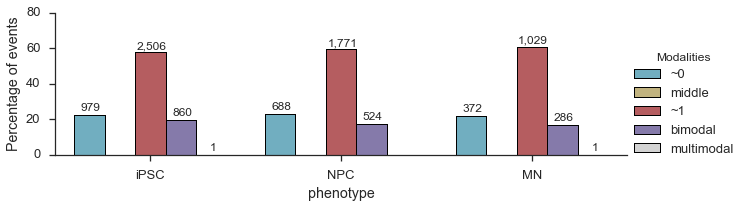

In [23]:
g = modalities_barplot(modalities_non_de, MODALITY_ORDER, study.phenotype_order, modality_factorplot_kws)
g.savefig('{}/non_de_genes_modalities.pdf'.format(folder))

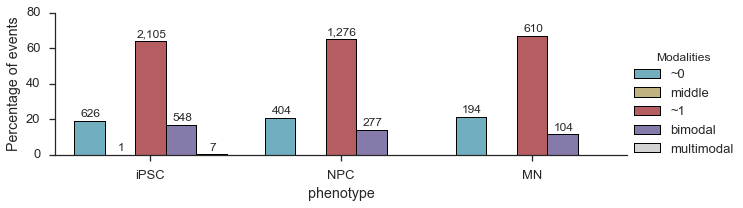

In [24]:
g = modalities_barplot(modalities_de, MODALITY_ORDER, study.phenotype_order, modality_factorplot_kws)
g.savefig('{}/de_genes_modalities.pdf'.format(folder))